<a href="https://colab.research.google.com/github/FlorianHilbert/Code-Bachelorarbeit/blob/main/Abbildung_1_Phasenportr%C3%A4t_inkl._Nullklinen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

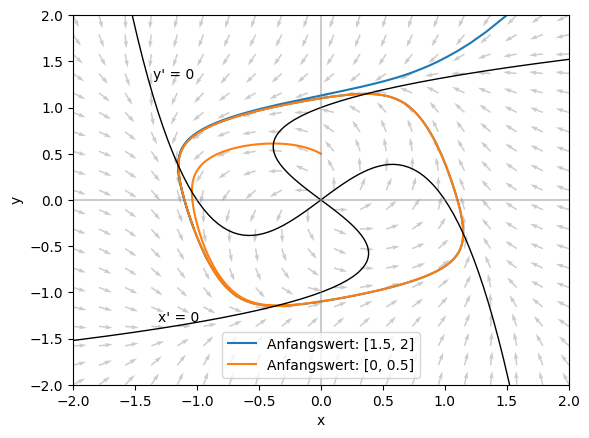

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Definieren der dem dynamischen System zugrundeliegenden Differentialgleichung und eine Hilfsfunktion um die euklidische Norm in einem Punkt (x,y) des Vektorfeldes zu berechnen
def euklidische_norm_dgl (x,y):
    return np.sqrt((x - y - x**3)**2 + (x + y - y**3)**2)

def dynamisches_System(t, z):
    x,y = z
    f1 = x - y - x**3
    f2 = x + y - y**3
    return np.array([f1, f2])

# Erstellen des normierten Richtungsfeldes auf dem Intervall [-2,2] mit 0.1 Abständen
Werte = np.linspace(-2, 2, 20)
x,y = np.meshgrid(Werte, Werte)

u = (x - y - x**3)/euklidische_norm_dgl(x,y)
v = (x + y - y**3)/euklidische_norm_dgl(x,y)

plt.quiver(x,y,u,v, color='gray', alpha=0.4)

# numerische Approximation beispielhafter Orbits mit der solve_ivp Funktion und Ergänzung in das Richtungsfeld
Anfangswerte = [[1.5, 2], [0,0.5]]
Zeitskala_T = [0, 10]
Zeitpunkte_t = np.linspace(*Zeitskala_T, 200)

for z0 in Anfangswerte:
    Orbit = solve_ivp(dynamisches_System, Zeitskala_T, z0, t_eval=Zeitpunkte_t)
    plt.plot(Orbit.y[0], Orbit.y[1], label=f"Anfangswert: {z0}")

#einzeichnen der in Definition 2.2.3 eingeführten Nullklinen mit den in Beispiel 2.2.3 bestimmten Gleichungen
Werte = np.linspace(-2, 2, 100)  #äquidistantes Gitter zum Plotten der Nullklinen
Nullkline_N_1 = Werte - Werte**3 #Bedingung: y' = 0
Nullkline_N_2 = - Werte + Werte**3  #Bedingung: x' = 0
# Nullklinen plotten
plt.plot(Werte, Nullkline_N_1, color = 'black', linewidth=1, label=None); plt.text(Werte[16], Nullkline_N_1[15], "y' = 0")
plt.plot(Nullkline_N_2, Werte, color = 'black', linewidth=1, label=None); plt.text(Nullkline_N_2[15], Werte[17], "x' = 0")



plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.axhline(y=0, color='gray', alpha = 0.4)
plt.axvline(x=0, color='gray', alpha = 0.4)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()